## Implementing AdaBoost Classification in Python

We will apply the AdaBoost technique to the real-world classification problem where our task is to predict the Gender of the person. For this purpose we are considering the dataset which holds the person’s physical information such as a person has long hair or not, width and height of the forehead, whether the nose is wide or long, whether lips are thin or not, etc. There are a total of 8 features on which we are going to build the classification model.    

Out of those 8 features, the first 7 features will be our input features and the last 8th feature is the target feature or output feature.

#### Read and load the data

The dataset is available in a CSV file and to load this data first we need to import the Pandas library. 

In [1]:
# Importing the required library
import pandas as pd

Now to read the data, we use the .read_csv() method and we also need to take a look at the data for that .head() method can be used.

In [2]:
# Reading the dataset
data = pd.read_csv('gender_classification.csv')

# Checking top 5 rows of dataset
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


After this let’s quickly check the shape of the data.

In [3]:
# Checking the shape of the dataset
data.shape

(5001, 8)

As we can see we have a total of 8 features and 5001 records. Here we are addressing a classification task and it is good practice to check the class label distribution of the output feature.    

In [4]:
# Class label count
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [5]:
# Percentage distribution
data['gender'].value_counts(normalize=True)

Female    0.5001
Male      0.4999
Name: gender, dtype: float64

Out of the records of all 5001 records, there are records of a total of 2501 (50.01%) are Females and 2500 (49.99%) are Males.

#### Define input(x)-output(y) features

After reading and understanding the dataset, let’s define the input and output features in the data.

In [6]:
# Defining input (X) and output (y) features
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

Now we have defined X and y, now we will create a separate training and testing dataset by using SK-Learn’s train_test_split() method.

In [7]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True, random_state = 0)

Before proceeding further, let's check the shapes of the training and testing features.

In [8]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((3500, 7), (1501, 7))

To train the classifier we have 3500 records and to evaluate the performance we have 1501 records. Now before training the classifier let’s check how the input training pattern looks.

In [9]:
# Input patterns
X_train

array([[ 1. , 12.3,  5.8, ...,  1. ,  1. ,  0. ],
       [ 1. , 14.7,  6.3, ...,  1. ,  1. ,  0. ],
       [ 1. , 13.1,  6.1, ...,  0. ,  1. ,  1. ],
       ...,
       [ 1. , 14.3,  6.2, ...,  1. ,  0. ,  0. ],
       [ 0. , 12. ,  6.8, ...,  1. ,  1. ,  1. ],
       [ 1. , 14.3,  5.7, ...,  0. ,  0. ,  0. ]])

As the training pattern looks fine and it seems there is no need for feature scaling, we will proceed with this in its original form.

#### Initializing and training the AdaBoost Classifier

As a next step, after having the training and test patterns ready, we will define and train the AdaBoost classifier model.

In [10]:
# Defining the Adaptive Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

AdaBoostClassifier()

#### Predicting and evaluating the classifier

Now we have successfully trained the AdaBoost classifier, let’s obtain the prediction on the test dataset. And compare it with actual values side-by-side. 

In [11]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

# Combining the actual and predicted values
pd.DataFrame(data={'Actual Gender': y_test, 'Predicted Gender': y_pred}).head()

,Actual Gender,Predicted Gender
0,Female,Female
1,Male,Male
2,Male,Male
3,Female,Female
4,Female,Female


We can see in the above comparison all the top 5 predicted records are matched with actual records; there might be some records that are not matched. To get insight into those records we can use a confusion matrix that can reveal the truth for all the predicted records.

C:\Users\thaku\anaconda3\envs\deep-learning\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


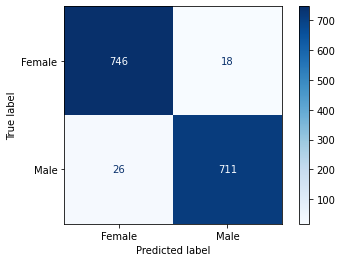

In [13]:
# Confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues');

From the above confusion matrix, the model has correctly predicted 746+711=1457 records and 26+18= 44 records predicted incorrectly. Now let’s check how accurate is the classifier to predict the unseen data using an accuracy score. 

In [14]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9706862091938707

As we can see the model has nearly 97% accuracy to predict the unseen data. For the final evaluation, let’s obtain the classification report, which will give us scores for various parameters. 

In [15]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.97      0.98      0.97       764
        Male       0.98      0.96      0.97       737

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



As we can see the model has been well evaluated on all the parameters and given satisfactory scores across all the evaluation parameters.

So this is how we can use the AdaBoost algorithm in a classification problem where it can predict the class labels more accurately. 